<a href="https://colab.research.google.com/github/chineidu/NLP-Tutorial/blob/main/notebook/03_tensorflow/02_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With TensorFlow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


### Create Data

* This data will be used to train the neural network

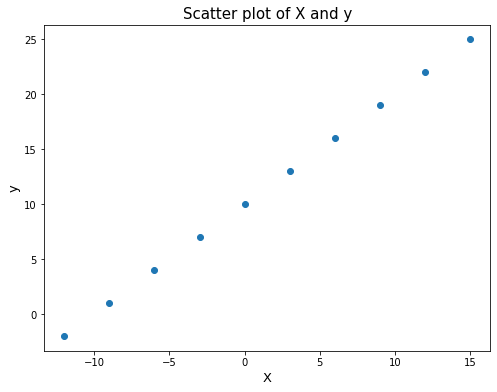

In [2]:
X = np.array([[-12, -9, -6, -3, 0, 3, 6, 9, 12, 15]]) # Row Matrix
y = np.array([-2, 1, 4, 7, 10, 13, 16, 19, 22, 25])


# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("X", size=13)
plt.ylabel("y", size=13)
plt.title("Scatter plot of X and y", size=15)
plt.show()

In [3]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [4]:
# Convert the NumPy arrays to Tensors
# Cast and reshape X
X = tf.cast(tf.constant(X), dtype=tf.float16)
X = tf.reshape(X, shape=(-1, 1))
y = tf.cast(tf.constant(y), dtype=tf.float16)

X.shape, y.shape

(TensorShape([10, 1]), TensorShape([10]))

### Steps In Modelling With TensorFlow

1. **Create a model**: define the `input`, `hidden` and `output` layers of the deep learning model.
2. **Compile the model**: define the `loss function` (i.e the function that tells our model how wrong it is), the `optimizer` (it tells our model how to improve the patterns its learning) and the `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fit the model**: the model `learns` the `patterns` between the input and the output

#### Create a baseline model


### Some Key Terms

* **Loss**: How wrong the model predictions are (you want to minimize this)
* **Optimizer**: It tells the model how it should update it's parameters to imporeve its predictions.
* **Metrics**: Human interpretable values for how well the model is performing.
* **Epocs**: This represents the number of times the model will go thru all the training examples.
* **Evaluation** (on unseen data): This tells us how reliable the our model predictions are on unseen data.

In [5]:
# Set seed for reproducibility
SEED = 123
tf.random.set_seed(SEED)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None) # The model has a single neuron

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE: Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # OR 'sgd'
              metrics = ["mae"] # OR tf.keras.losses.mae
              )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 646ms/step - loss: 10.6708 - mae: 10.6708
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 10.6383 - mae: 10.6383
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 10.6058 - mae: 10.6058
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 10.5733 - mae: 10.5733
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 10.5408 - mae: 10.5408


In [6]:
X, y

(<tf.Tensor: shape=(10, 1), dtype=float16, numpy=
 array([[-12.],
        [ -9.],
        [ -6.],
        [ -3.],
        [  0.],
        [  3.],
        [  6.],
        [  9.],
        [ 12.],
        [ 15.]], dtype=float16)>,
 <tf.Tensor: shape=(10,), dtype=float16, numpy=array([-2.,  1.,  4.,  7., 10., 13., 16., 19., 22., 25.], dtype=float16)>)

In [7]:
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 0s 174ms/step


array([[11.350482]], dtype=float32)

In [8]:
# Since the mae is ~11 on average, let's add 11 to the predicted value
y_pred + 11

array([[22.350483]], dtype=float32)

### Improve The Model

> We can improve the model by altering the steps taken to create the model.

1. **Create model**: We might:
  * Add more layers
  * increase the number of hidden units(neurons)
  * change the activation function

2. **Compile model**: We might:
  * change the optimization function
  * change the learning rate

3. **Fit the model**: We might:
  * increase the number of epochs
  * increase the training data

In [9]:
# Rebuild the model by increasing the number of epochs

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (increase the epochs)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 556ms/step - loss: 11.6569 - mae: 11.6569
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 11.4984 - mae: 11.4984
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 11.3399 - mae: 11.3399
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 11.2070 - mae: 11.2070
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 11.1745 - mae: 11.1745
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 11.1420 - mae: 11.1420
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 11.1095 - mae: 11.1095
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 11.0770 - mae: 11.0770
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 11.0445 - mae: 11.0445
Epoch 10/100
1/1 [==============================] - 0s 50ms/step - loss: 11.0120 - mae: 11.0120
Epoch 11/100
1/1 [==============================

In [10]:
# Make predictions
y_pred = model.predict([18])
y_pred

1/1 [==============================] - 1s 561ms/step


array([[29.87001]], dtype=float32)

#### Tweak The Model

* Experiment by changing the `hyperparameters`.
* Add a new layer.

In [11]:
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation="ReLU"),
    tf.keras.layers.Dense(units=1, activation=None)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

# Fit model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.2549 - mae: 12.2549
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.9212 - mae: 11.9212
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.5885 - mae: 11.5885
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 11.2570 - mae: 11.2570
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.9277 - mae: 10.9277
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5926 - mae: 10.5926
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 10.2577 - mae: 10.2577
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9112 - mae: 9.9112
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 9.5504 - mae: 9.5504
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 9.1724 - mae: 9.1724
Epoch 11/100
1/1 [==============================] - 0s 22

In [14]:
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 144ms/step


array([[32.084877]], dtype=float32)